![](https://www.evrimagaci.org/public/content_media/8ee347b9bc1ee90bf1db8f9c00217b5f.png)

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*stpRRU3tUaOtTjRqh24v0w.png)

In [53]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

### Veri Kümesini Oluşturmak ve Ayırmak

In [54]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
print("x_train shape \t:",x_train.shape, "\ny_train shape \t:", y_train.shape, "\nx_test shape \t:", x_test.shape, "\ny_test shape \t:", y_test.shape)

x_train shape 	: (60000, 28, 28) 
y_train shape 	: (60000,) 
x_test shape 	: (10000, 28, 28) 
y_test shape 	: (10000,)


In [56]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1 ))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1 ))

In [57]:
print("x_train (EĞİTİM) shape \t:",x_train.shape, "\nx_test (TEST) shape \t:", x_test.shape)

x_train (EĞİTİM) shape 	: (60000, 28, 28, 1) 
x_test (TEST) shape 	: (10000, 28, 28, 1)


#### Veriye gürültü ekleme Adımı

In [58]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

### Gürültülü veriyi görselleştirme

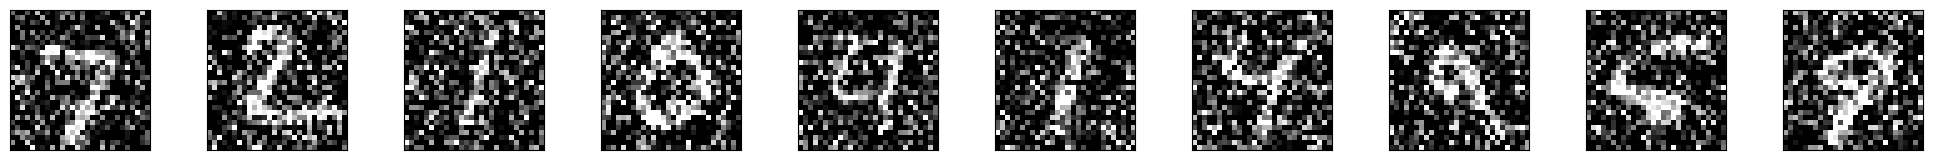

Gürültü eklenmiş Orijinal Görüntüler


In [59]:
%matplotlib inline

n = 10
plt.figure(figsize= (25,4))

for i in range (n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Gürültü eklenmiş Orijinal Görüntüler")

## Encode Modeli

In [60]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)

x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation="relu", padding="same")(x)

encoded = MaxPooling2D((2,2), padding="same")(x)

#(7, 7, 32)

### Decode Modeli

In [61]:
x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation="relu", padding="same")(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

## Modelin Derlenmesi ve Eğitilmesi

In [62]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [63]:
autoencoder.fit(x_train_noisy, x_train,
                
                epochs=150,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir="/tmp/tb", histogram_freq=0, write_graph=False)],
                
                verbose=1,
                validation_split=0.0,                
                class_weight=None,
                sample_weight=None,
                initial_epoch=0,
                steps_per_epoch=None,
                validation_steps=None,
                validation_batch_size=None,
                validation_freq=1,)

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.7003 - val_loss: 0.6947
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6923 - val_loss: 0.6834
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.6786 - val_loss: 0.6586
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.6453 - val_loss: 0.5883
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.5621 - val_loss: 0.5136
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.5063 - val_loss: 0.5018
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4968 - val_loss: 0.4941
Epoch 8/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.4888 - val_loss: 0.4863
Epoch 9/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4804 - val_loss: 0.4773
Epoch 10/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4716 - val_loss: 0.4684
Epoch 11/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4624 - val_loss: 0.4598
Epoch 12/150
469/469 ━━━━━━━━━

#### Sonuçların Görselleştirilmesi

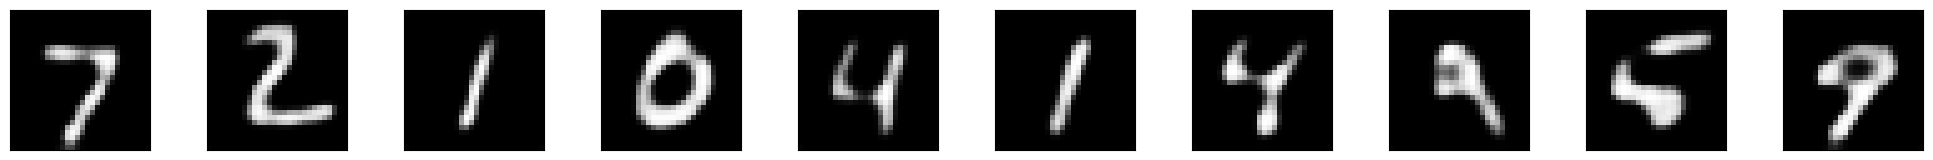

GÜRÜLTÜSÜ BASTIRILMIŞ GÖRÜNTÜ


In [64]:
%matplotlib inline

n = 10
plt.figure(figsize= (25,4))

for i in range (n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("GÜRÜLTÜSÜ BASTIRILMIŞ GÖRÜNTÜ")